In [1]:
#!python3 -m venv venv
#!source venv/bin/activate
#!pip install numpy pandas matplotlib seaborn nbformat ffmpeg 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import pylab
import seaborn as sns

In [2]:
SEA_training_data = pd.read_csv("artificial/sea/SEA_training_data.csv", names=["x", "y", "z"], header=None)
SEA_training_class = pd.read_csv("artificial/sea/SEA_training_class.csv", names=["class"], header=None)
sea = SEA_training_data
sea["class"] = SEA_training_class["class"]
sea.to_csv("artificial/sea/sea.csv", index=False )

In [ ]:
'''
#!pip install plotly
import plotly.express as px
sea["size"] = [0.1]*len(sea)
fig = px.scatter_3d(sea[0:1000], x="x", y="y", z="z", color="class", size = "size")

fig.show()
'''

In [ ]:
'''
sns.pairplot(sea, hue="class")
'''

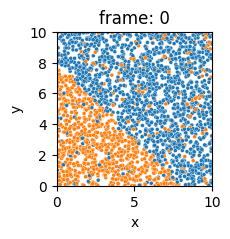

In [37]:
points = 2500
expected_time = 5000
df_len = len(sea)
_frames = 20
_interval = int(expected_time/_frames)
step = int((df_len-points)/_frames)

fig, ax = plt.subplots()
fig.set()
fig.set_figheight(2)
fig.set_figwidth(2)
def animate(i):
    plt.clf()
    plt.title("frame: "+str(i))
    ax = sns.scatterplot(sea[i*step:i*step+points], x="x", y="y", hue="class", s=8.0)
    ax.set(xlim=(0, 10), ylim=(0, 10))
    ax.legend([],[], frameon=False)

ani = animation.FuncAnimation(fig, animate, frames=_frames,interval=_interval,repeat=True)

writer = animation.PillowWriter(fps=5)
ani.save('images/sea_drift.gif', writer=writer)


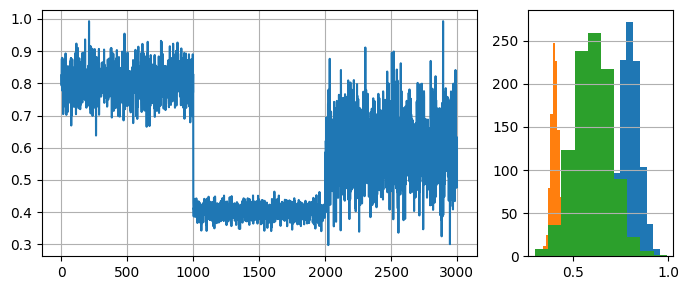

In [51]:
from matplotlib import gridspec

# Generate data for 3 distributions
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8, 0.05, 1000)
dist_b = random_state.normal(0.4, 0.02, 1000)
dist_c = random_state.normal(0.6, 0.1, 1000)

# Concatenate data to simulate a data stream with 2 drifts
stream = np.concatenate((dist_a, dist_b, dist_c))

# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(dist_a, label=r'$dist_a$')
    ax2.hist(dist_b, label=r'$dist_b$')
    ax2.hist(dist_c, label=r'$dist_c$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(dist_a, dist_b, dist_c)


In [55]:
stream.shape

(3000,)

In [47]:
from river import drift

drift_detector = drift.ADWIN()
drifts = []

stream = (sea['x']+sea['y']).values

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)

#plot_data(dist_a, dist_b, dist_c, drifts)

In [50]:
(sea['x']+sea['y']).values

array([10.5838 ,  1.0974 , 10.5438 , ...,  3.55915, 11.3076 ,  9.7442 ])